# Analysis of the influence of glioma size on prediction score

In [ ]:
%pip install synapseclient

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 905.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.2/468.2 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.2/196.2 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.4/118.4 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.4.0
    Uninstalling urllib3-2.4.0:
      Successfully uninstalled urllib3-2.4.0
  Attempting uninstall: psutil
    Found existing installation: psutil 5.9.5
    Uninstalling psutil-5.9.5:
      Successfully uninstalled psutil-5.9.5


In [ ]:
%%shell
synapse get -r syn66723977

Synapse username (Optional): Krzysztof_Tkaczyk
Auth token for user Krzysztof_Tkaczyk:
Welcome, Krzysztof_Tkaczyk!

[syn66723977:Africa]: Syncing Folder from Synapse.
[syn66723978]: Downloaded to /content/summary.json
[syn66723979]: Downloaded to /content/Output_data.zip

In [ ]:
%%shell
ls -l

total 1264
-rw-r--r-- 1 root root 1130971 Jun  9 18:39 Output_data.zip
drwxr-xr-x 1 root root    4096 Jun  5 13:38 sample_data
-rw-r--r-- 1 root root  149957 Jun  9 18:39 summary.json
-rw-r--r-- 1 root root     283 Jun  9 18:39 SYNAPSE_METADATA_MANIFEST.tsv


In [ ]:
import json

# Ścieżka do pliku JSON
sciezka_do_pliku = 'summary.json'

# Wczytanie i wyświetlenie zawartości
with open(sciezka_do_pliku, 'r', encoding='utf-8') as plik:
    dane = json.load(plik)
    print(json.dumps(dane, indent=4, ensure_ascii=False))

{
    "author": "Fabian",
    "description": "",
    "id": "0c4e7e31faf7",
    "name": "",
    "results": {
        "all": [
            {
                "1": {
                    "Accuracy": 0.9801961245519714,
                    "Dice": 0.012973600620767809,
                    "False Discovery Rate": 0.9932649394308236,
                    "False Negative Rate": 0.8240193851279721,
                    "False Omission Rate": 0.0006214400825997919,
                    "False Positive Rate": 0.01920865084246337,
                    "Jaccard": 0.006529153626152575,
                    "Negative Predictive Value": 0.9993785599174002,
                    "Precision": 0.0067350605691763755,
                    "Recall": 0.17598061487202787,
                    "Total Positives Reference": 6603,
                    "Total Positives Test": 172530,
                    "True Negative Rate": 0.9807913491575366
                },
                "2": {
                    "Accuracy": 0.981715

In [ ]:
import os
import pandas as pd

data = dane
rows = []
for item in data['results']['all']:
    label_filename = os.path.basename(item['reference'])
    prediction_filename = os.path.basename(item['test'])
    for cls in ['1', '2', '3']:
        metrics = item[cls].copy()
        metrics['class'] = int(cls)
        metrics['label_filename'] = label_filename
        metrics['prediction_filename'] = prediction_filename
        rows.append(metrics)

df = pd.DataFrame(rows)
cols = ['label_filename', 'prediction_filename', 'class'] + [col for col in df.columns if col not in ['label_filename', 'prediction_filename', 'class']]
df = df[cols]

print(df)

                 label_filename         prediction_filename  class  Accuracy  \
0    BraTS-SSA-00002-000.nii.gz  BraTS-SSA-00002-000.nii.gz      1  0.980196   
1    BraTS-SSA-00002-000.nii.gz  BraTS-SSA-00002-000.nii.gz      2  0.981716   
2    BraTS-SSA-00002-000.nii.gz  BraTS-SSA-00002-000.nii.gz      3  0.997589   
3    BraTS-SSA-00007-000.nii.gz  BraTS-SSA-00007-000.nii.gz      1  0.976354   
4    BraTS-SSA-00007-000.nii.gz  BraTS-SSA-00007-000.nii.gz      2  0.972722   
..                          ...                         ...    ...       ...   
175  BraTS-SSA-00223-000.nii.gz  BraTS-SSA-00223-000.nii.gz      2  0.979045   
176  BraTS-SSA-00223-000.nii.gz  BraTS-SSA-00223-000.nii.gz      3  0.997860   
177  BraTS-SSA-00230-000.nii.gz  BraTS-SSA-00230-000.nii.gz      1  0.983875   
178  BraTS-SSA-00230-000.nii.gz  BraTS-SSA-00230-000.nii.gz      2  0.979638   
179  BraTS-SSA-00230-000.nii.gz  BraTS-SSA-00230-000.nii.gz      3  0.992388   

         Dice  False Discovery Rate  Fa

In [ ]:
best_class2 = df[df['class'] == 2].sort_values(by='Dice', ascending=False).iloc[0]
best_class2

,85
label_filename,BraTS-SSA-00092-000.nii.gz
prediction_filename,BraTS-SSA-00092-000.nii.gz
class,2
Accuracy,0.998517
Dice,0.791635
False Discovery Rate,0.097157
False Negative Rate,0.295181
False Omission Rate,0.001184
False Positive Rate,0.000304
Jaccard,0.655129


## Total results

<ipython-input-5-21767e7c3938>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


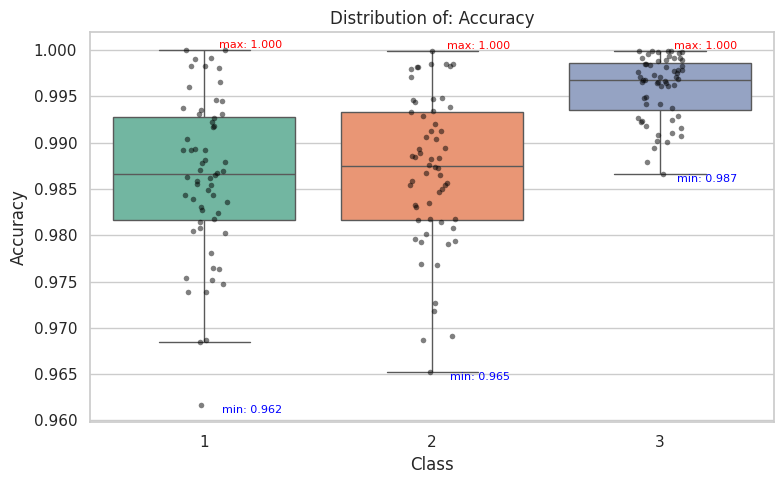

<ipython-input-5-21767e7c3938>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


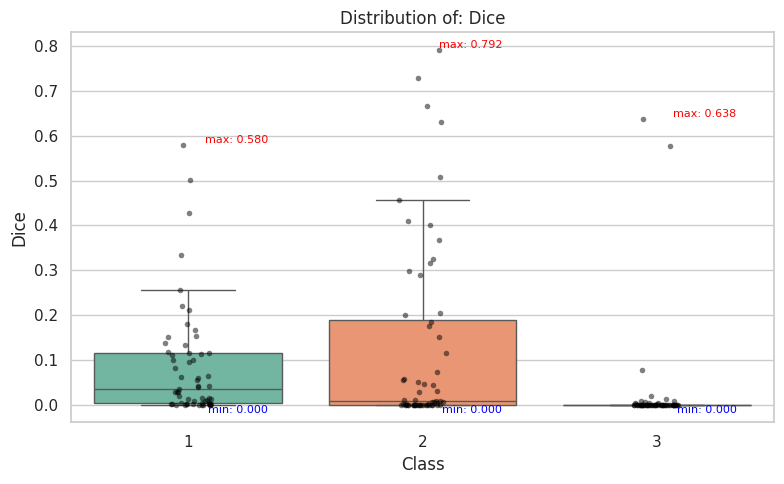

<ipython-input-5-21767e7c3938>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


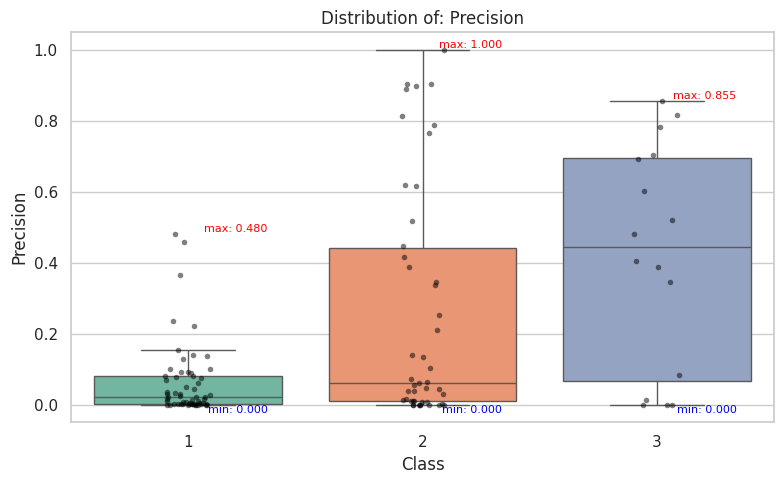

<ipython-input-5-21767e7c3938>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


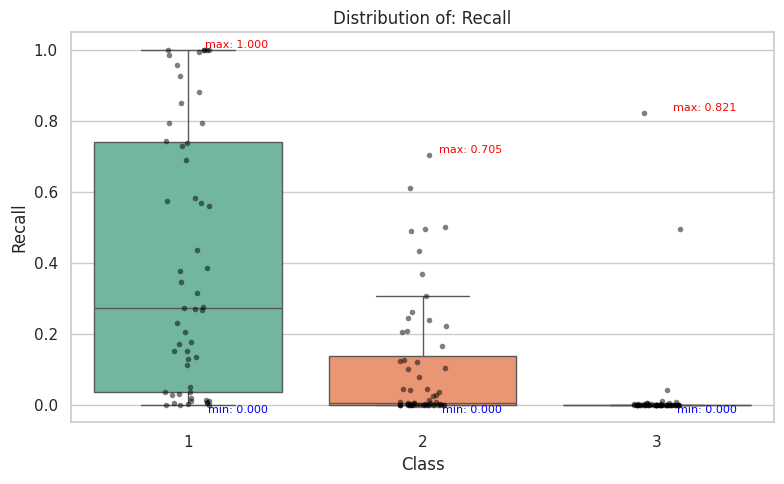

<ipython-input-5-21767e7c3938>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


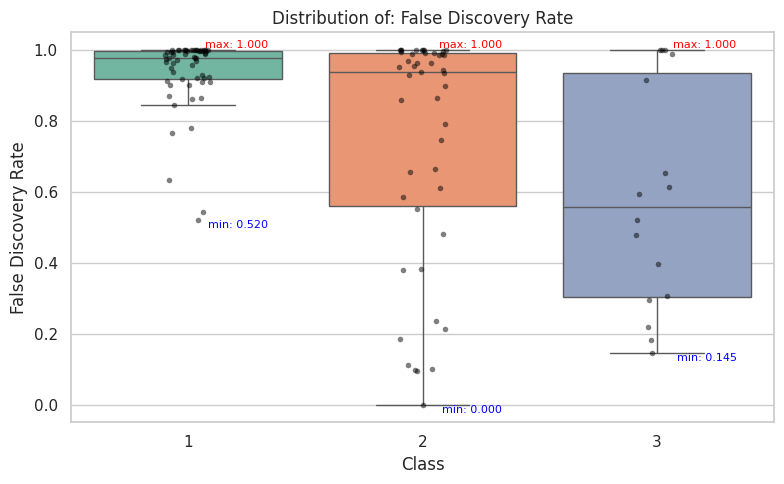

<ipython-input-5-21767e7c3938>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


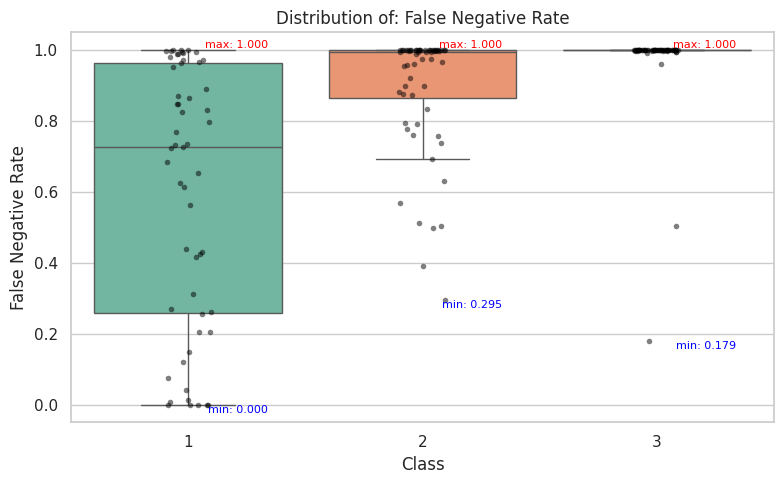

<ipython-input-5-21767e7c3938>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


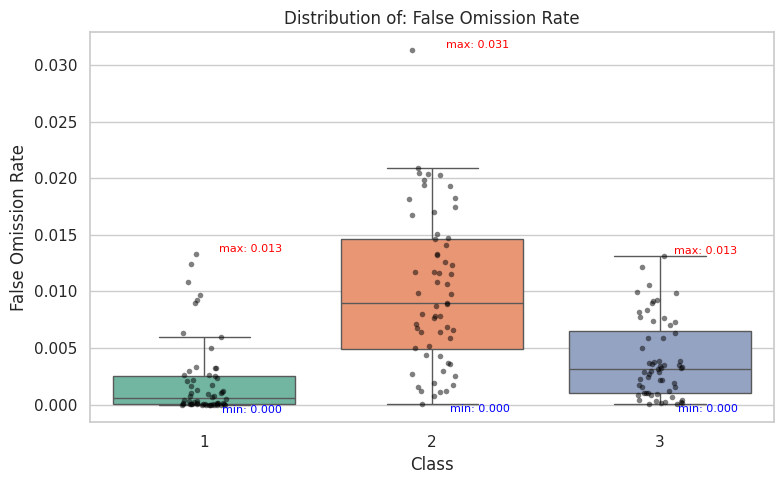

<ipython-input-5-21767e7c3938>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


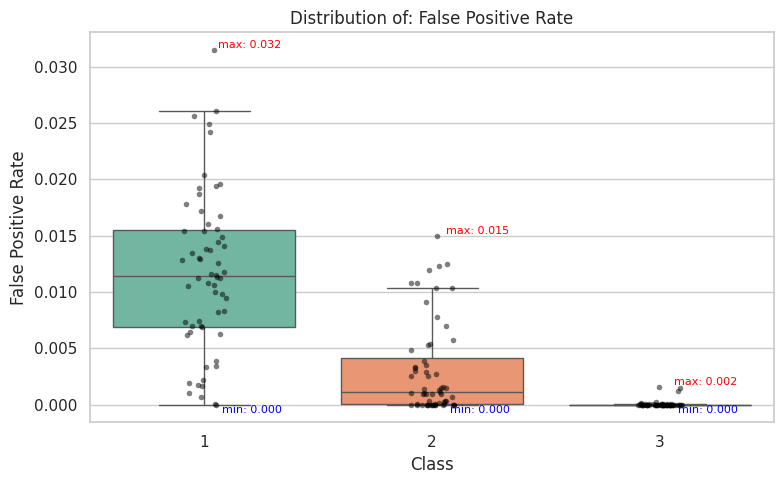

<ipython-input-5-21767e7c3938>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


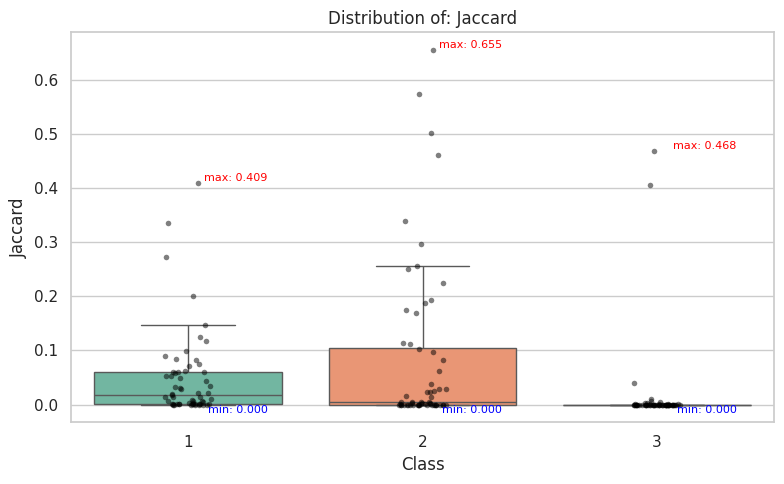

<ipython-input-5-21767e7c3938>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


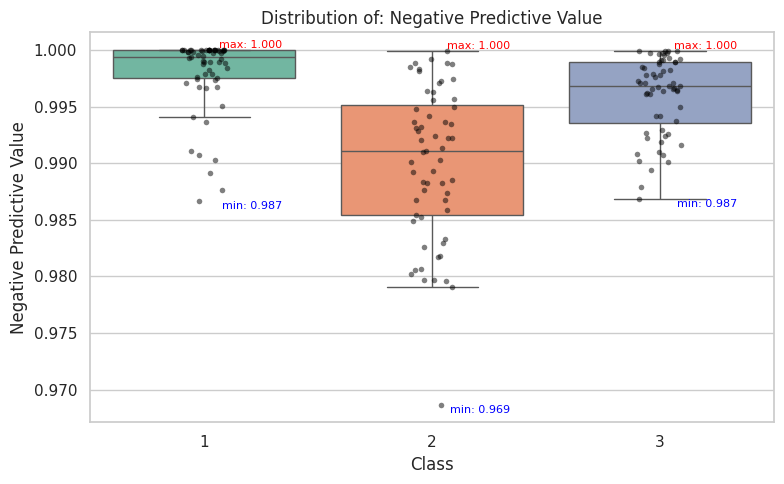

<ipython-input-5-21767e7c3938>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


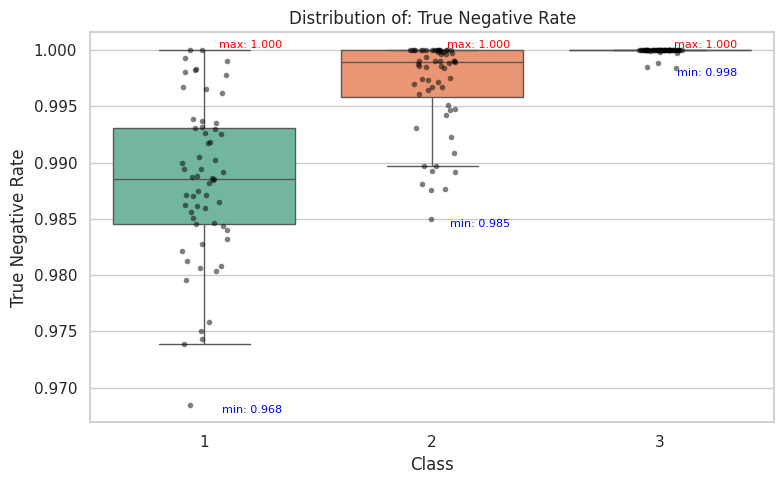

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

metrics = ['Accuracy', 'Dice', 'Precision', 'Recall',
           'False Discovery Rate', 'False Negative Rate',
           'False Omission Rate', 'False Positive Rate',
           'Jaccard', 'Negative Predictive Value',
           'True Negative Rate']

sns.set(style="whitegrid")

for metric in metrics:
    if metric in df.columns:
        plt.figure(figsize=(8, 5))
        ax = sns.boxplot(
            data=df, x='class', y=metric, palette='Set2', showcaps=True, fliersize=0
        )
        sns.stripplot(
            data=df, x='class', y=metric, color='black', size=4, jitter=True, ax=ax, alpha=0.5
        )

        for cls in sorted(df['class'].unique()):
            vals = df[df['class'] == cls][metric].dropna()
            if not vals.empty:
                min_val = vals.min()
                max_val = vals.max()
                ax.text(cls - 0.66, min_val, f"min: {min_val:.3f}", color='blue', ha='right', va='top', fontsize=8)
                ax.text(cls - 0.66, max_val, f"max: {max_val:.3f}", color='red', ha='right', va='bottom', fontsize=8)

        plt.title(f'Distribution of: {metric}')
        plt.xlabel('Class')
        plt.ylabel(metric)
        plt.tight_layout()
        plt.show()


Same thing but on one plot

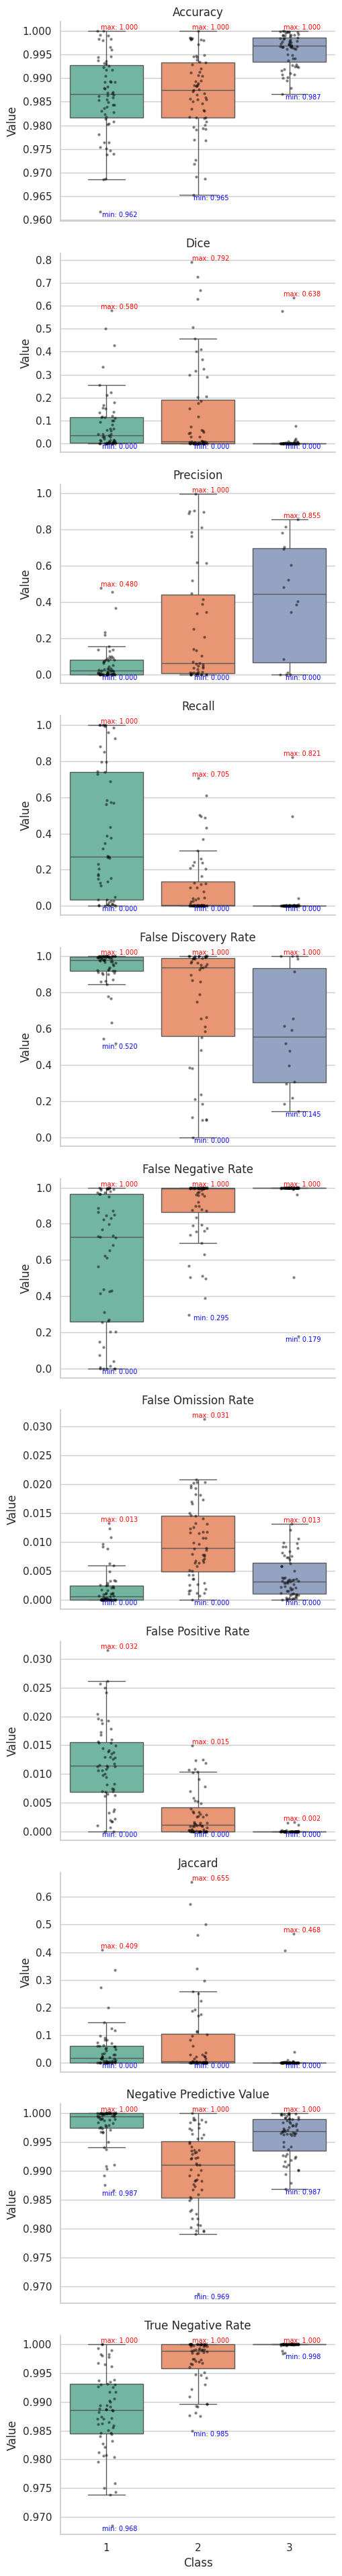

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

metrics = ['Accuracy', 'Dice', 'Precision', 'Recall',
           'False Discovery Rate', 'False Negative Rate',
           'False Omission Rate', 'False Positive Rate',
           'Jaccard', 'Negative Predictive Value',
           'True Negative Rate']

df_long = df.melt(id_vars=['class'], value_vars=metrics, var_name='metric', value_name='value')

g = sns.FacetGrid(df_long, col="metric", col_wrap=1, height=3.5, aspect=1.5, sharey=False)

def plot_box_with_annotations(data, color, **kwargs):
    ax = plt.gca()
    sns.boxplot(data=data, x='class', y='value', palette='Set2', showcaps=True, fliersize=0, ax=ax)
    sns.stripplot(data=data, x='class', y='value', color='black', size=3, jitter=True, alpha=0.5, ax=ax)

    for cls in sorted(data['class'].unique()):
        vals = data[data['class'] == cls]['value'].dropna()
        if not vals.empty:
            min_val = vals.min()
            max_val = vals.max()
            ax.text(cls - 0.66, min_val, f"min: {min_val:.3f}", color='blue', ha='right', va='top', fontsize=7)
            ax.text(cls - 0.66, max_val, f"max: {max_val:.3f}", color='red', ha='right', va='bottom', fontsize=7)

g.map_dataframe(plot_box_with_annotations)

g.set_titles(col_template="{col_name}")
g.set_axis_labels("Class", "Value")
plt.tight_layout()
plt.show()


## Calculation of sizes of clasess

In [ ]:
!synapse get syn51692615

Synapse username (Optional): Krzysztof_Tkaczyk
Auth token for user Krzysztof_Tkaczyk:
Welcome, Krzysztof_Tkaczyk!

[syn51692615]: Downloaded to /content/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData.zip


In [ ]:
%%shell
unzip /content/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData.zip -d /ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData

Archive:  /content/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData.zip
   creating: /ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2/
   creating: /ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2/BraTS-SSA-00121-000/
  inflating: /ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2/BraTS-SSA-00121-000/BraTS-SSA-00121-000-seg.nii.gz  
  inflating: /ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2/BraTS-SSA-00121-000/BraTS-SSA-00121-000-t1n.nii.gz  
  inflating: /ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2/BraTS-SSA-00121-000/BraTS-SSA-00121-000-t2f.nii.gz  
  inflating: /ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2/BraTS-SSA-00121-000/BraTS-SSA-00121-000-t2w.nii.gz  
  in

In [ ]:
import os
import shutil
from pathlib import Path
import json

# Ścieżki wejściowe i wyjściowe
input_dir = "/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2"
task_name = "Task02_BrainSSA"
base_output = "/content/nnUNet_raw_data_base/nnUNet_raw_data"
task_dir = os.path.join(base_output, task_name)
imagesTr_dir = os.path.join(task_dir, "imagesTr")
labelsTr_dir = os.path.join(task_dir, "labelsTr")

os.makedirs(imagesTr_dir, exist_ok=True)
os.makedirs(labelsTr_dir, exist_ok=True)

# Mapowanie modalności
modality_map = {
    "t1c": 0,
    "t1n": 1,
    "t2f": 2,
    "t2w": 3
}

# Lista folderów pacjentów
subdirs = [d for d in os.listdir(input_dir) if os.path.isdir(os.path.join(input_dir, d))]

for subdir in subdirs:
    full_path = os.path.join(input_dir, subdir)

    for file in os.listdir(full_path):
        filepath = os.path.join(full_path, file)

        if file.endswith(".nii.gz") and not "-seg.nii.gz" in file:
            # Rozpoznaj modalność
            for mod in modality_map:
                if f"-{mod}.nii.gz" in file:
                    nnunet_id = f"{subdir}_{modality_map[mod]:04}.nii.gz"
                    dest_path = os.path.join(imagesTr_dir, nnunet_id)
                    shutil.copy(filepath, dest_path)

        elif file.endswith("-seg.nii.gz"):
            label_dest = os.path.join(labelsTr_dir, f"{subdir}.nii.gz")
            shutil.copy(filepath, label_dest)

print("✅ Pliki zostały przekonwertowane do imagesTr i labelsTr.")

# Tworzenie dataset.json
dataset_json = {
    "name": "BraTS2023_SSA_Training",
    "description": "Converted BraTS2023 SSA Training data for nnUNet",
    "tensorImageSize": "4D",
    "modality": {
        "0": "T1c",
        "1": "T1n",
        "2": "T2f",
        "3": "T2w"
    },
    "labels": {
        "0": "background",
        "1": "tumor"
    },
    "numTraining": len(subdirs),
    "training": [
        {
            "image": f"./imagesTr/{subdir}_0000.nii.gz",
            "label": f"./labelsTr/{subdir}.nii.gz"
        } for subdir in subdirs
    ],
    "numTest": 0,
    "test": []
}

with open(os.path.join(task_dir, "dataset.json"), "w") as f:
    json.dump(dataset_json, f, indent=4)

print("✅ dataset.json został utworzony.")


✅ Pliki zostały przekonwertowane do imagesTr i labelsTr.
✅ dataset.json został utworzony.


In [ ]:
%pip install nibabel

In [ ]:
import nibabel as nib
import numpy as np
import pandas as pd
import os
from tqdm import tqdm

base_path = "/content/nnUNet_raw_data_base/nnUNet_raw_data/Task02_BrainSSA/labelsTr/"
reference_files = df['label_filename'].unique()
reference_paths = [os.path.join(base_path, f) for f in reference_files]

volume_data = []

for path in tqdm(reference_paths, desc="Processing NIfTI files"):
    img = nib.load(path)
    data = img.get_fdata()

    classes, counts = np.unique(data, return_counts=True)
    class_volume = dict(zip(classes.astype(int), counts))

    filename = os.path.basename(path)

    record = {
        'label_filename': filename,
        'volume_class_1': class_volume.get(1, 0),
        'volume_class_2': class_volume.get(2, 0),
        'volume_class_3': class_volume.get(3, 0),
        'volume_total_voxels': int(np.prod(data.shape)),
    }
    volume_data.append(record)

volume_df = pd.DataFrame(volume_data)

df = df.merge(volume_df, on='label_filename', how='left')


Processing NIfTI files: 100%|██████████| 60/60 [00:25<00:00,  2.34it/s]


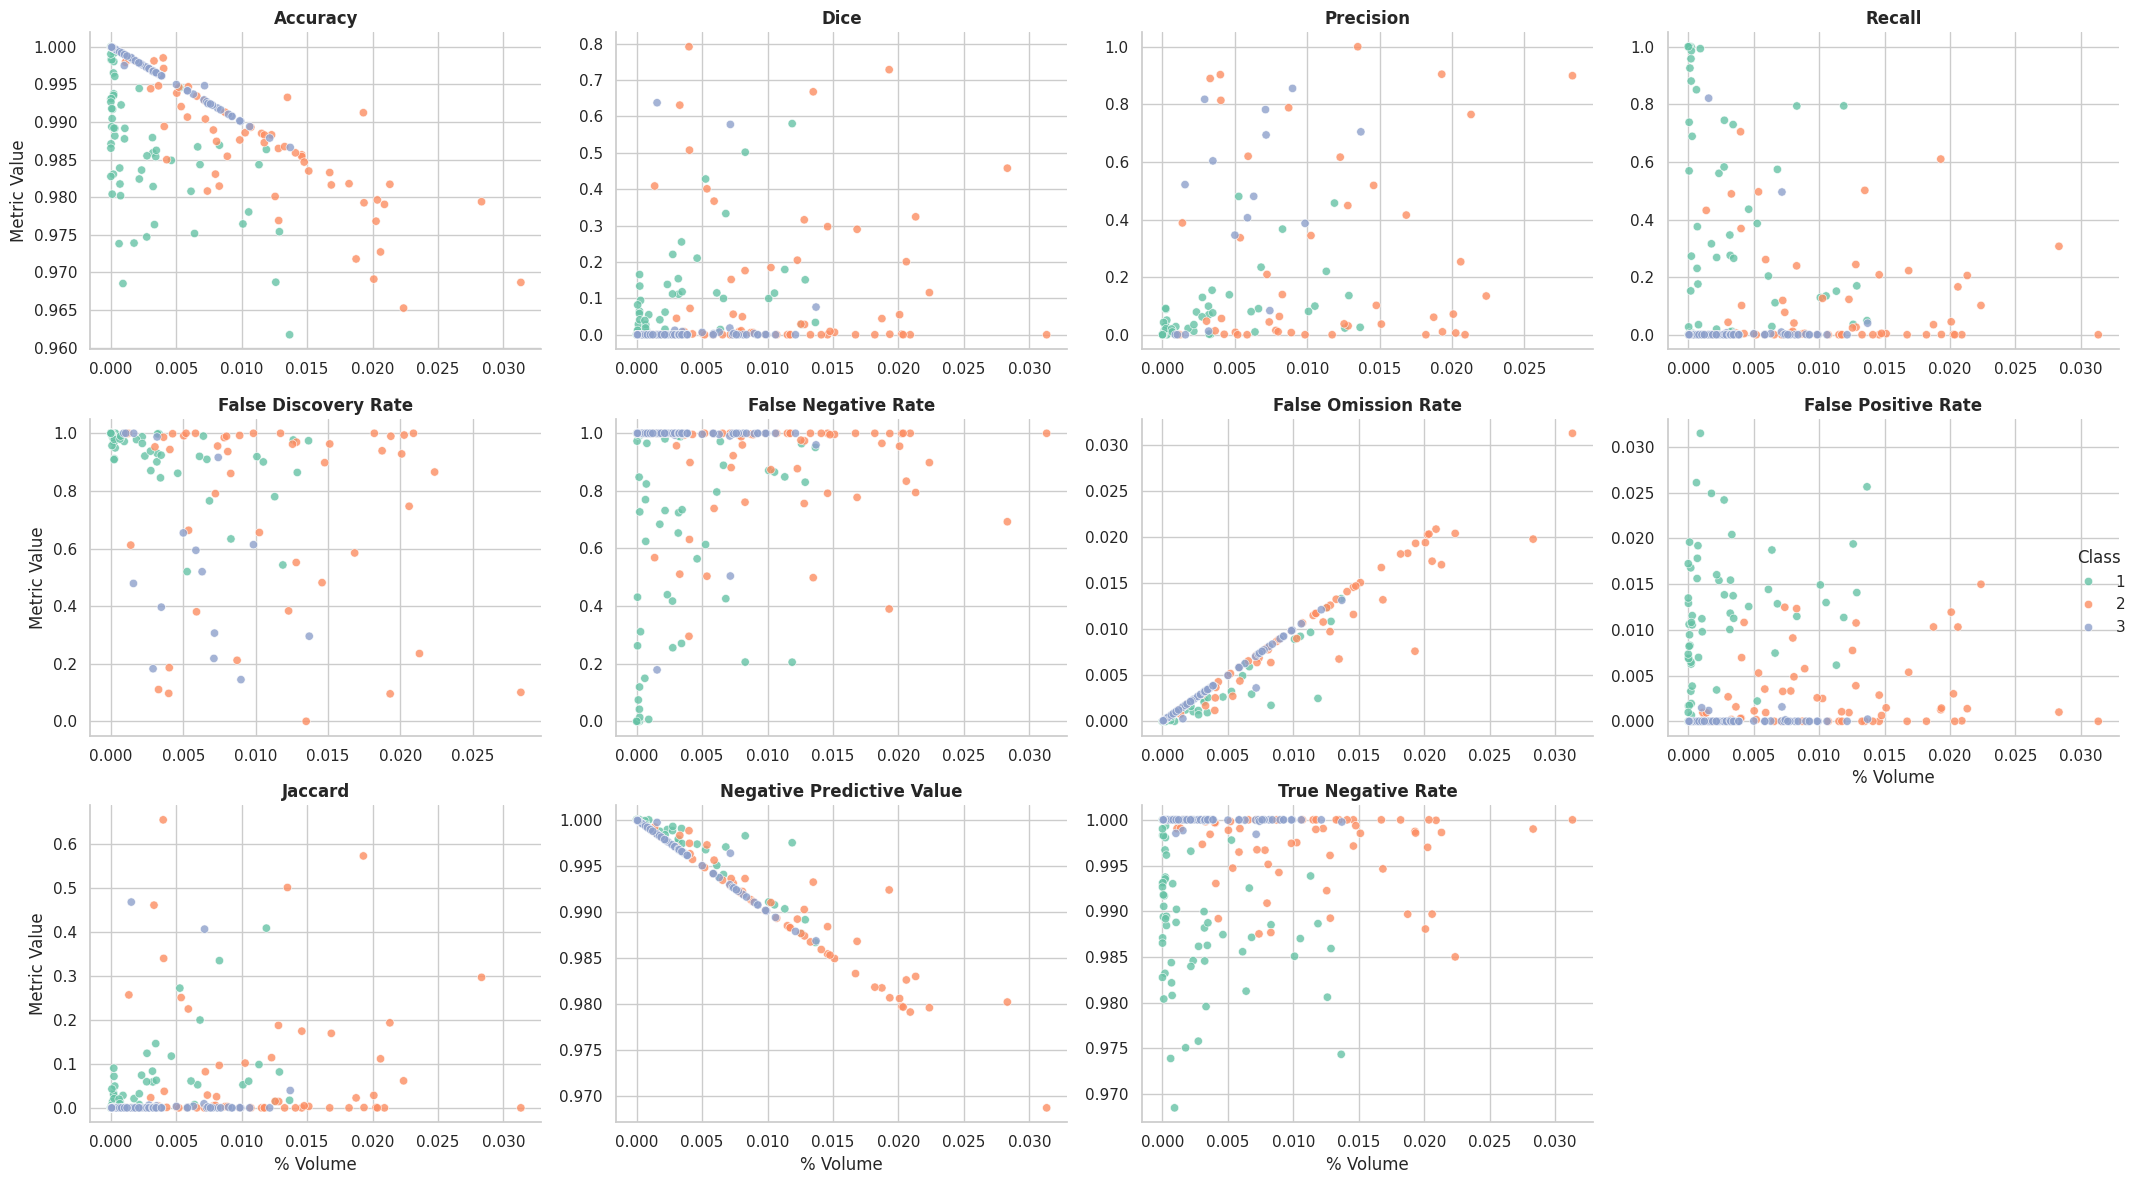

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

metrics = ['Accuracy', 'Dice', 'Precision', 'Recall',
           'False Discovery Rate', 'False Negative Rate',
           'False Omission Rate', 'False Positive Rate',
           'Jaccard', 'Negative Predictive Value',
           'True Negative Rate']

for cls in [1, 2, 3]:
    df[f'volume_frac_{cls}'] = df[f'volume_class_{cls}'] / df['volume_total_voxels']

plot_data = []
for metric in metrics:
    for cls in [1, 2, 3]:
        temp = df[df['class'] == cls].copy()
        temp['metric'] = metric
        temp['value'] = temp[metric]
        temp['volume_frac'] = temp[f'volume_frac_{cls}']
        temp['class'] = str(cls)
        plot_data.append(temp[['metric', 'value', 'volume_frac', 'class']])

plot_df = pd.concat(plot_data)

g = sns.FacetGrid(plot_df, col="metric", col_wrap=4, height=4, aspect=1.3, sharex=False, sharey=False)
g.map_dataframe(sns.scatterplot, x="volume_frac", y="value", hue="class", palette="Set2", alpha=0.8)

g.set_axis_labels("% Volume", "Metric Value")
g.add_legend(title="Class")

for ax, title in zip(g.axes.flat, plot_df['metric'].unique()):
    ax.set_title(title, fontweight='bold')

plt.tight_layout()
plt.show()


In [ ]:
%%shell
unzip /content/Output_data.zip -d /Output_data

Archive:  /content/Output_data.zip
   creating: /Output_data/content/OUTPUT_DIRECTORY/
  inflating: /Output_data/content/OUTPUT_DIRECTORY/BraTS-SSA-00046-000.nii.gz  
  inflating: /Output_data/content/OUTPUT_DIRECTORY/BraTS-SSA-00057-000.nii.gz  
  inflating: /Output_data/content/OUTPUT_DIRECTORY/BraTS-SSA-00037-000.nii.gz  
  inflating: /Output_data/content/OUTPUT_DIRECTORY/BraTS-SSA-00230-000.nii.gz  
  inflating: /Output_data/content/OUTPUT_DIRECTORY/BraTS-SSA-00115-000.nii.gz  
  inflating: /Output_data/content/OUTPUT_DIRECTORY/BraTS-SSA-00117-000.nii.gz  
  inflating: /Output_data/content/OUTPUT_DIRECTORY/BraTS-SSA-00012-000.nii.gz  
  inflating: /Output_data/content/OUTPUT_DIRECTORY/BraTS-SSA-00002-000.nii.gz  
  inflating: /Output_data/content/OUTPUT_DIRECTORY/BraTS-SSA-00055-000.nii.gz  
  inflating: /Output_data/content/OUTPUT_DIRECTORY/BraTS-SSA-00056-000.nii.gz  
  inflating: /Output_data/content/OUTPUT_DIRECTORY/BraTS-SSA-00047-000.nii.gz  
  inflating: /Output_data/content

In [ ]:
import os
from google.colab import files

def find_and_download_files(filenames, search_paths):
    """
    Szuka i pobiera pliki .nii.gz po nazwie w wielu folderach.

    :param filenames: Lista nazw plików do znalezienia (np. ['BraTS-SSA-00202-000.nii.gz'])
    :param search_paths: Lista katalogów do przeszukania
    """
    found_files = []

    for search_path in search_paths:
        for root, dirs, files_in_dir in os.walk(search_path):
            for name in files_in_dir:
                if name in filenames:
                    full_path = os.path.join(root, name)
                    if full_path not in found_files:
                        found_files.append(full_path)
                        print(f"✅ Znaleziono: {full_path}")
                        files.download(full_path)

    # Sprawdzenie, których plików nie znaleziono
    found_names = [os.path.basename(p) for p in found_files]
    missing = set(filenames) - set(found_names)
    if missing:
        print(f"❌ Nie znaleziono plików: {missing}")

# 🔧 Przykład użycia:

file_names = [
    "BraTS-SSA-00092-000.nii.gz",
]

search_dirs = [
    "/Output_data/content/OUTPUT_DIRECTORY",  # np. po rozpakowaniu Output_data.zip
]

find_and_download_files(file_names, search_dirs)


✅ Znaleziono: /Output_data/content/OUTPUT_DIRECTORY/BraTS-SSA-00092-000.nii.gz


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
ls -l /content

total 724952
-rw-r--r-- 1 root root 741044955 Jun  9 18:52 ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData.zip
drwxr-xr-x 3 root root      4096 Jun  9 18:59 nnUNet_raw_data_base/
-rw-r--r-- 1 root root   1130971 Jun  9 18:39 Output_data.zip
drwxr-xr-x 1 root root      4096 Jun  5 13:38 sample_data/
-rw-r--r-- 1 root root    149957 Jun  9 18:39 summary.json
-rw-r--r-- 1 root root       283 Jun  9 18:39 SYNAPSE_METADATA_MANIFEST.tsv


In [ ]:
ls -l /content/nnUNet_raw_data_base/nnUNet_raw_data/Task02_BrainSSA/labelsTr/

total 3792
-rw-rw-r-- 1 root root 66548 Jun  9 18:59 BraTS-SSA-00002-000.nii.gz
-rw-rw-r-- 1 root root 77975 Jun  9 18:59 BraTS-SSA-00007-000.nii.gz
-rw-rw-r-- 1 root root 57514 Jun  9 18:59 BraTS-SSA-00008-000.nii.gz
-rw-rw-r-- 1 root root 70585 Jun  9 18:59 BraTS-SSA-00010-000.nii.gz
-rw-rw-r-- 1 root root 66603 Jun  9 18:59 BraTS-SSA-00011-000.nii.gz
-rw-rw-r-- 1 root root 57067 Jun  9 18:59 BraTS-SSA-00012-000.nii.gz
-rw-rw-r-- 1 root root 51961 Jun  9 18:59 BraTS-SSA-00014-000.nii.gz
-rw-rw-r-- 1 root root 90405 Jun  9 18:59 BraTS-SSA-00015-000.nii.gz
-rw-rw-r-- 1 root root 79232 Jun  9 18:59 BraTS-SSA-00025-000.nii.gz
-rw-rw-r-- 1 root root 61440 Jun  9 18:59 BraTS-SSA-00026-000.nii.gz
-rw-rw-r-- 1 root root 63434 Jun  9 18:59 BraTS-SSA-00028-000.nii.gz
-rw-rw-r-- 1 root root 39992 Jun  9 18:59 BraTS-SSA-00037-000.nii.gz
-rw-rw-r-- 1 root root 47293 Jun  9 18:59 BraTS-SSA-00041-000.nii.gz
-rw-rw-r-- 1 root root 63634 Jun  9 18:59 BraTS-SSA-00044-000.nii.gz
-rw-rw-r-- 1 root root 